Geopandas/Maps

In [ ]:
pip install pandas numpy shapely fiona pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [ ]:
dataFrame = pd.DataFrame(
    {'City': ['Tripoli', 'Algiers', 'Khartoum', 'Nairobi', 'Kampala'],
     'Country': ['Libya', 'Algeria', 'Sudan', 'Kenya', 'Uganda'],
     'Latitude': [32.89, 36.75, 15.50, -1.29, 0.31],
     'Longitude': [13.19, 3.06, 32.56, 36.82, 32.58]})
dataFrame

,City,Country,Latitude,Longitude
0,Tripoli,Libya,32.89,13.19
1,Algiers,Algeria,36.75,3.06
2,Khartoum,Sudan,15.50,32.56
3,Nairobi,Kenya,-1.29,36.82
4,Kampala,Uganda,0.31,32.58


In [ ]:
dataFrame['Coordinates'] = list(zip(dataFrame.Longitude, dataFrame.Latitude))
dataFrame

,City,Country,Latitude,Longitude,Coordinates
0,Tripoli,Libya,32.89,13.19,"(13.19, 32.89)"
1,Algiers,Algeria,36.75,3.06,"(3.06, 36.75)"
2,Khartoum,Sudan,15.50,32.56,"(32.56, 15.5)"
3,Nairobi,Kenya,-1.29,36.82,"(36.82, -1.29)"
4,Kampala,Uganda,0.31,32.58,"(32.58, 0.31)"


In [ ]:
dataFrame['Coordinates'] = dataFrame['Coordinates'].apply(Point)
dataFrame

,City,Country,Latitude,Longitude,Coordinates
0,Tripoli,Libya,32.89,13.19,POINT (13.19 32.89)
1,Algiers,Algeria,36.75,3.06,POINT (3.06 36.75)
2,Khartoum,Sudan,15.50,32.56,POINT (32.56 15.5)
3,Nairobi,Kenya,-1.29,36.82,POINT (36.82 -1.29)
4,Kampala,Uganda,0.31,32.58,POINT (32.58 0.31)


In [ ]:
geoDF = geopandas.GeoDataFrame(dataFrame, geometry='Coordinates')
geoDF

,City,Country,Latitude,Longitude,Coordinates
0,Tripoli,Libya,32.89,13.19,POINT (13.19000 32.89000)
1,Algiers,Algeria,36.75,3.06,POINT (3.06000 36.75000)
2,Khartoum,Sudan,15.50,32.56,POINT (32.56000 15.50000)
3,Nairobi,Kenya,-1.29,36.82,POINT (36.82000 -1.29000)
4,Kampala,Uganda,0.31,32.58,POINT (32.58000 0.31000)


In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

<ipython-input-86-21cf0a24543a>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


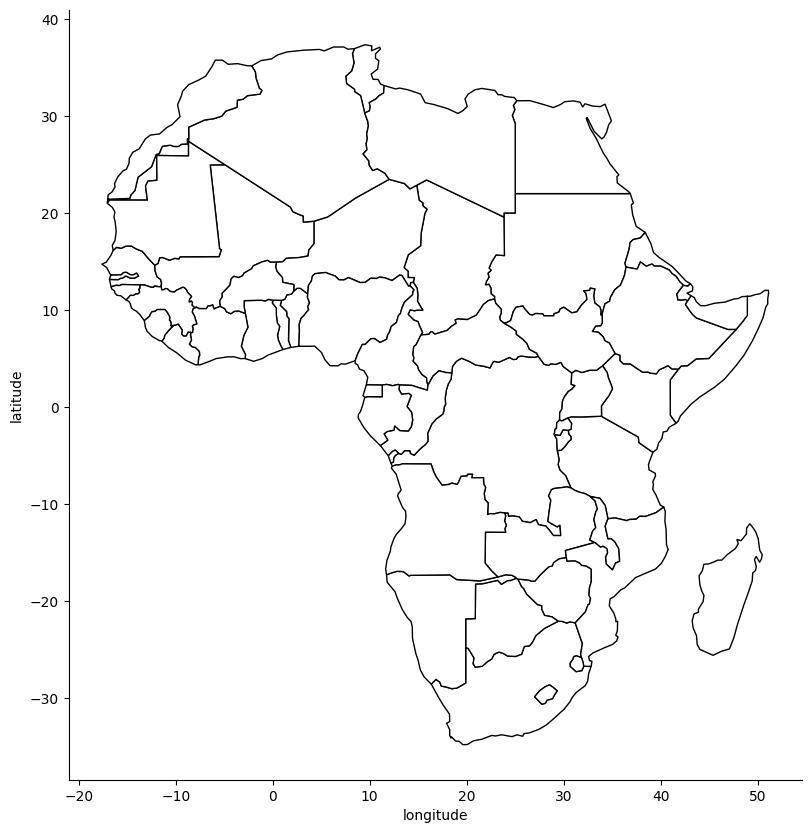

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

world[world['continent'] == 'Africa'].plot(ax = gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


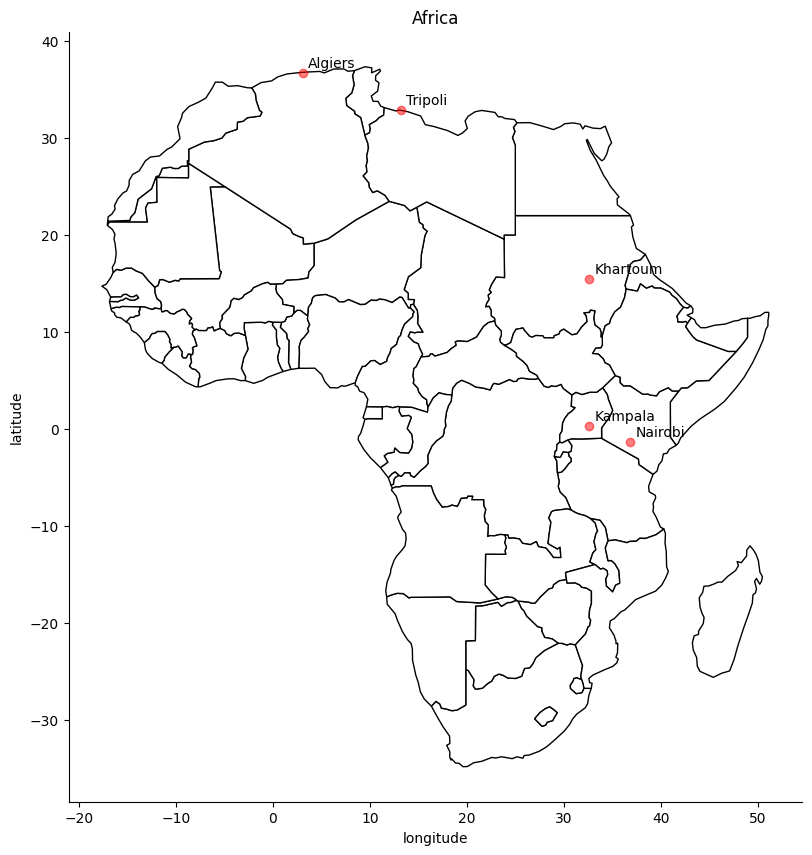

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))


world[world['continent'] == 'Africa'].plot(ax = gax, edgecolor='black',color='white')

geoDF.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Africa')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

for x, y, label in zip(geoDF['Coordinates'].x, geoDF['Coordinates'].y, geoDF['City']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

Matplotlib

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotnine as p9

dataFrame2 = pd.read_csv(io.BytesIO(uploaded['Heart_Disease_Prediction.csv']))
dataFrame2

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
dataFrame2 = dataFrame2.rename(columns={'Heart Disease': 'HD'})

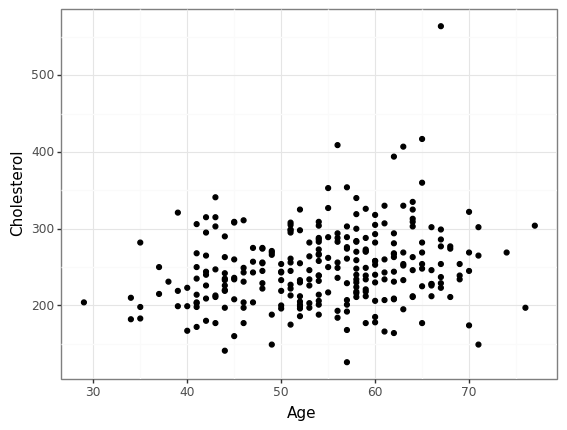

In [ ]:
print(
    p9.ggplot(data=dataFrame2, mapping=p9.aes(x='Age', y='Cholesterol')) +
    p9.geom_point() +
    p9.theme_bw())

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


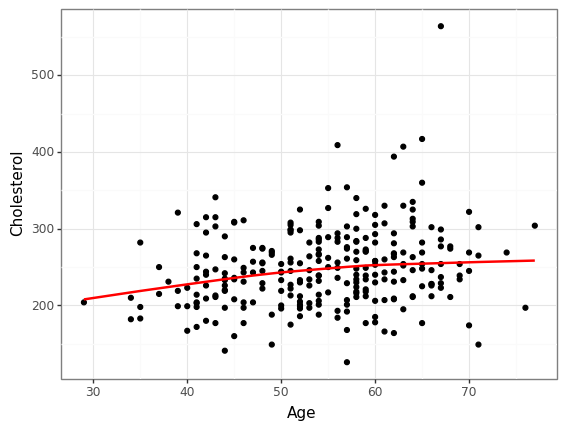

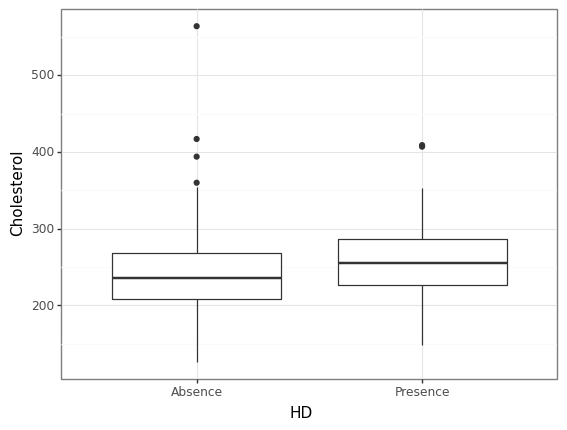

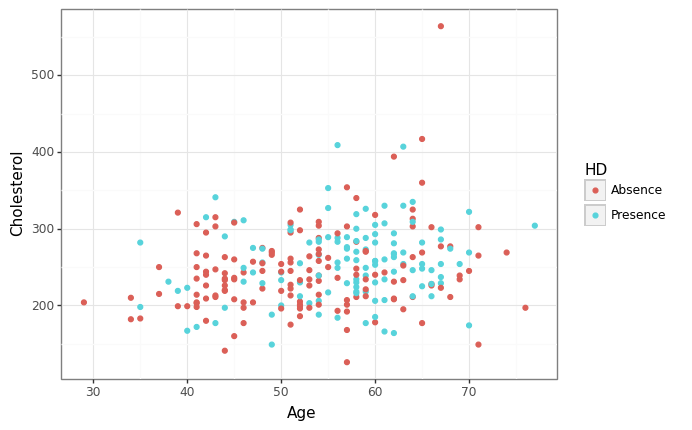

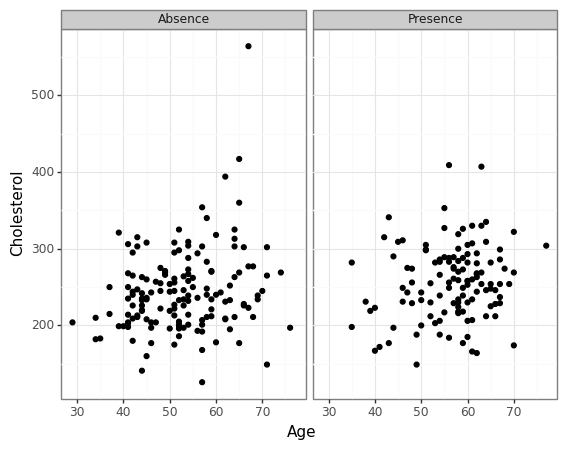

In [ ]:
print(
    p9.ggplot(dataFrame2, p9.aes(x='Age', y='Cholesterol')) +
    p9.geom_point() +
    p9.geom_smooth(color = "red") +
    p9.theme_bw())

print(
    p9.ggplot(dataFrame2, p9.aes(x='HD', y='Cholesterol')) +
    p9.geom_boxplot() +
    p9.theme_bw())

print(
    p9.ggplot(dataFrame2, p9.aes(x='Age', y='Cholesterol')) +
    p9.geom_point(p9.aes(color='HD')) +
    p9.theme_bw())

print(
    p9.ggplot(dataFrame2, p9.aes(x='Age', y='Cholesterol')) +
    p9.geom_point() +
    p9.facet_wrap('~ HD') +
    p9.theme_bw())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataFrame2 = pd.read_csv(io.BytesIO(uploaded['Heart_Disease_Prediction.csv']))

In [ ]:
dataFrame2 = dataFrame2.rename(columns={'Heart Disease': 'HD'})


In [ ]:
dataFrame2['HD'] = dataFrame2['HD'].astype('category')
dataFrame2['HD'] = dataFrame2['HD'].cat.codes
dataFrame2

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HD
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


<ipython-input-22-05372e256dbf>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


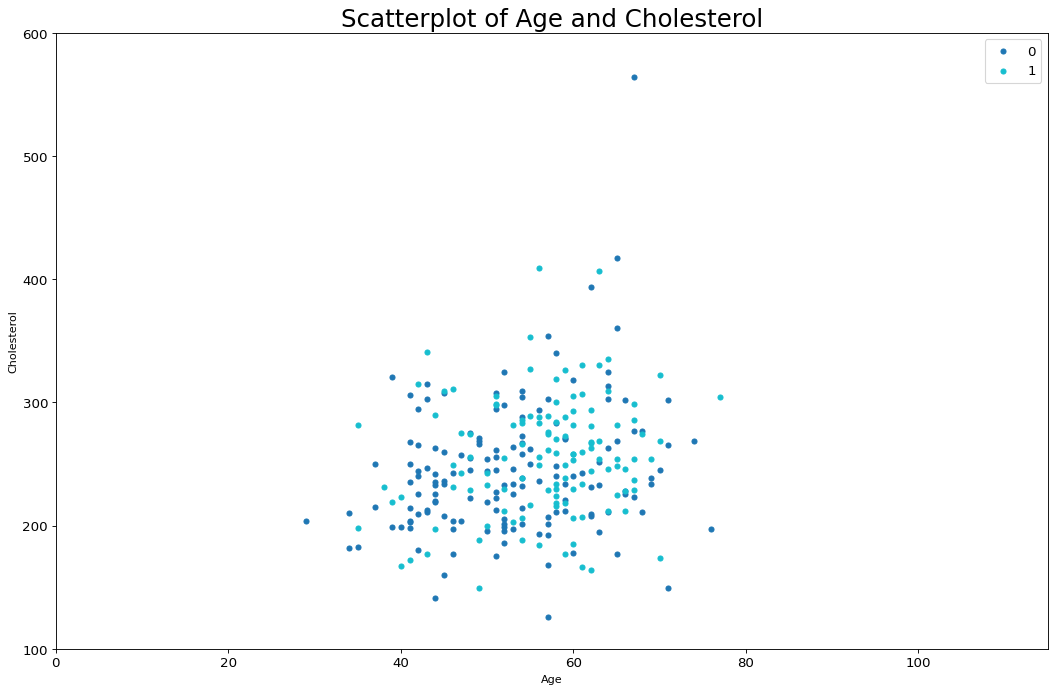

In [ ]:

labels = np.unique(dataFrame2['HD'])
colors = [plt.cm.tab10(i/float(len(labels)-1)) for i in range(len(labels))]

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, origin in enumerate(labels):
    plt.scatter('Age', 'Cholesterol',
                data=dataFrame2.loc[dataFrame2.HD==origin, :],
                s=20, c=colors[i], label=str(origin))


plt.gca().set(xlim=(0, 115), ylim=(100, 600),
              xlabel='Age', ylabel='Cholesterol')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Age and Cholesterol", fontsize=22)
plt.legend(fontsize=12)
plt.show()

Scatterplot with Regression Line

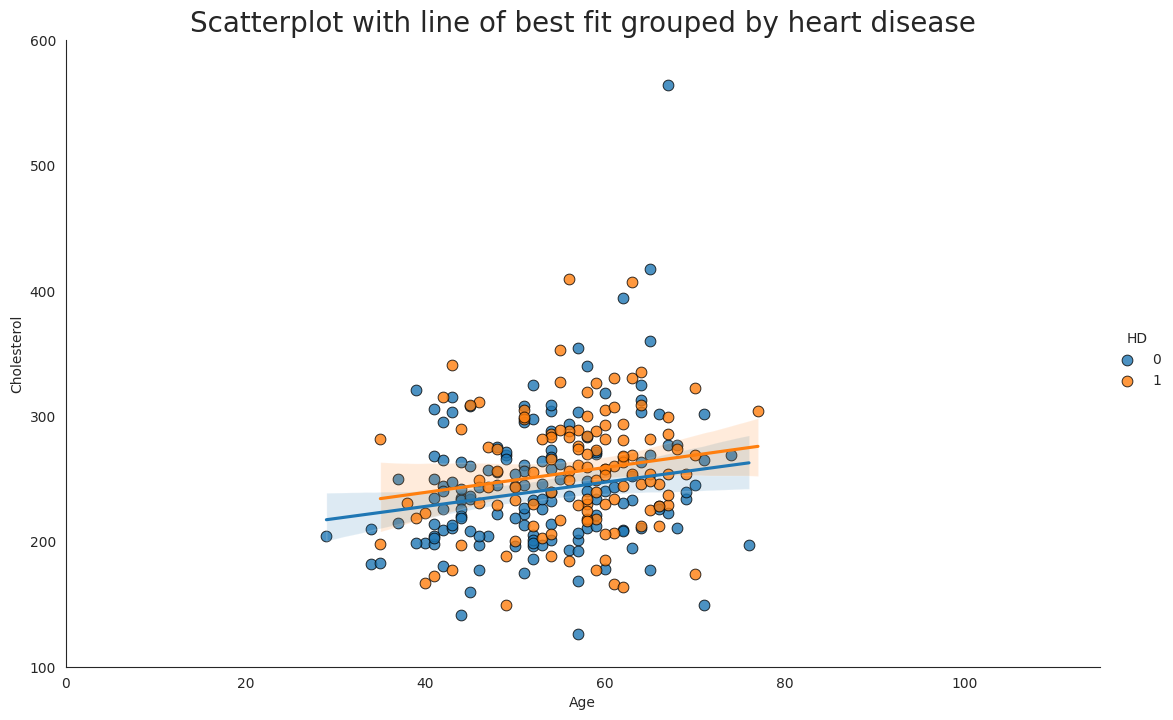

In [ ]:

dataFrame2_select = dataFrame2.loc[dataFrame2.HD.isin([0,1]), :]

sns.set_style("white")
gridobj = sns.lmplot(x="Age", y="Cholesterol", hue="HD", data=dataFrame2_select,
                     height=7, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))


gridobj.set(xlim=(0, 115), ylim=(100, 600))
plt.title("Scatterplot with line of best fit grouped by heart disease", fontsize=20)
plt.show()

Correllogram

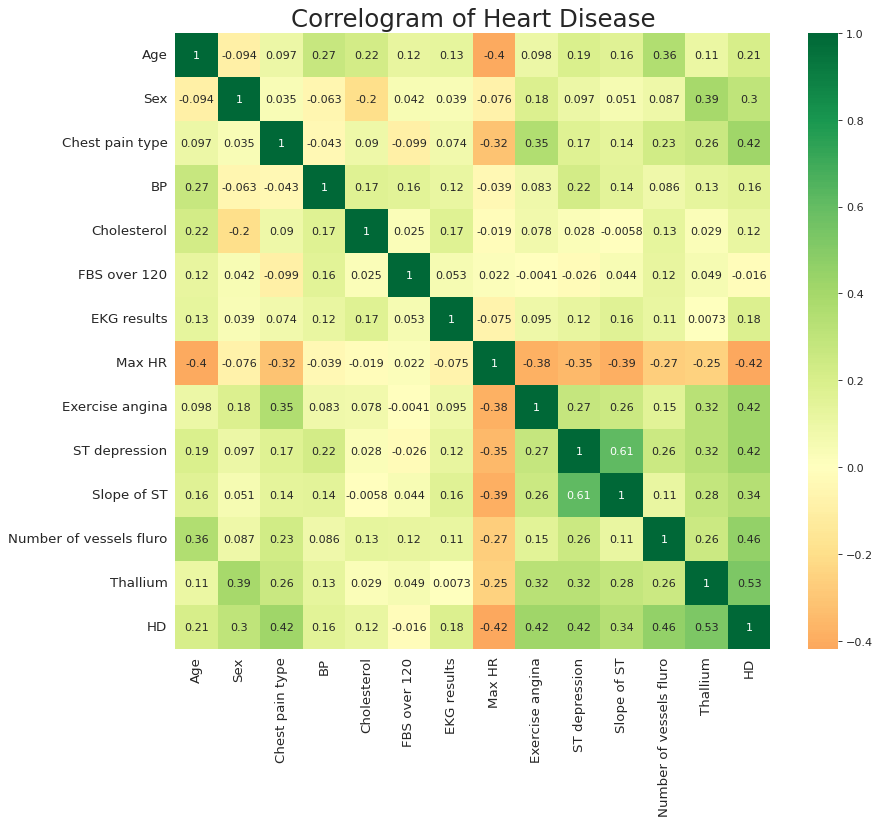

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(dataFrame2.corr(), xticklabels=dataFrame2.corr().columns, yticklabels=dataFrame2.corr().columns, cmap='RdYlGn', center=0, annot=True)


plt.title('Correlogram of Heart Disease', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Diverging Bars

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Population_Growth.csv to Population_Growth (2).csv


     Country Name Country Code                Indicator Name Indicator Code  \
0           Aruba          ABW  Population growth (annual %)    SP.POP.GROW   
1     Afghanistan          AFG  Population growth (annual %)    SP.POP.GROW   
2          Angola          AGO  Population growth (annual %)    SP.POP.GROW   
3         Albania          ALB  Population growth (annual %)    SP.POP.GROW   
4         Andorra          AND  Population growth (annual %)    SP.POP.GROW   
..            ...          ...                           ...            ...   
259        Kosovo          XKX  Population growth (annual %)    SP.POP.GROW   
260   Yemen, Rep.          YEM  Population growth (annual %)    SP.POP.GROW   
261  South Africa          ZAF  Population growth (annual %)    SP.POP.GROW   
262        Zambia          ZMB  Population growth (annual %)    SP.POP.GROW   
263      Zimbabwe          ZWE  Population growth (annual %)    SP.POP.GROW   

     1960      1961      1962      1963      1964  

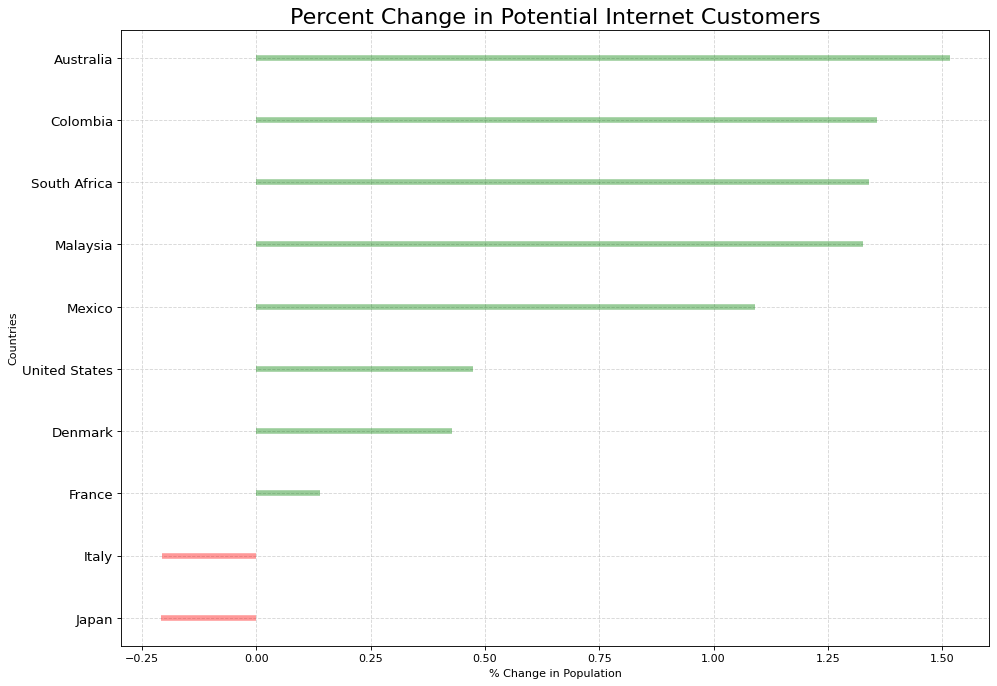

In [ ]:
dataFrame3 = pd.read_csv("Population_Growth.csv")

print(dataFrame3)
countries_to_keep = ['Mexico', 'South Africa', 'Japan', 'Australia', 'France', 'Malaysia', 'Italy', 'United States', 'Denmark', 'Colombia' ]
dataFrame3 = dataFrame3[dataFrame3['Country Name'].isin(countries_to_keep)]

dataFrame3


x = dataFrame3['2019']



dataFrame3['colors'] = ['red' if x < 0 else 'green' for x in dataFrame3['2019']]
dataFrame3.sort_values( by='2019', inplace=True)
dataFrame3.reset_index(inplace=True)


plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=dataFrame3.index, xmin=0, xmax=dataFrame3['2019'], color=dataFrame3.colors, alpha=0.4, linewidth=5)


plt.gca().set(ylabel='Countries', xlabel='% Change in Population')
plt.yticks(dataFrame3.index, dataFrame3['Country Name'], fontsize=12)
plt.title('Percent Change in Potential Internet Customers', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [ ]:
dataFrame3

,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,colors
0,117,Japan,JPN,Population growth (annual %),SP.POP.GROW,NaN,2.606188,0.931995,1.017430,1.041944,...,-0.159711,-0.144272,-0.132694,-0.106125,-0.115284,-0.164484,-0.202670,-0.208999,NaN,red
1,114,Italy,ITA,Population growth (annual %),SP.POP.GROW,NaN,0.668383,0.676623,0.729553,0.822624,...,0.269541,1.159251,0.917504,-0.096376,-0.169884,-0.149861,-0.190064,-0.206039,NaN,red
2,75,France,FRA,Population growth (annual %),SP.POP.GROW,NaN,1.318705,1.396483,1.404835,1.324961,...,0.484005,0.514784,0.473704,0.355569,0.263869,0.210011,0.151734,0.140234,NaN,green
3,56,Denmark,DNK,Population growth (annual %),SP.POP.GROW,NaN,0.698142,0.778455,0.787727,0.799213,...,0.376272,0.416901,0.507053,0.706424,0.780393,0.643351,0.495839,0.429153,NaN,green
4,249,United States,USA,Population growth (annual %),SP.POP.GROW,NaN,1.657730,1.537997,1.439165,1.389046,...,0.727269,0.686773,0.727518,0.730641,0.716669,0.631008,0.522337,0.473954,NaN,green
5,152,Mexico,MEX,Population growth (annual %),SP.POP.GROW,NaN,3.112655,3.105964,3.103570,3.107591,...,1.355289,1.315561,1.277676,1.241178,1.203251,1.163968,1.126421,1.091362,NaN,green
6,167,Malaysia,MYS,Population growth (annual %),SP.POP.GROW,NaN,3.155497,3.209105,3.186548,3.073093,...,1.445661,1.369114,1.340491,1.344948,1.357865,1.360193,1.352512,1.327061,NaN,green
7,261,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,NaN,2.453268,2.486399,2.514285,2.535788,...,1.583107,1.605752,1.583168,1.528926,1.464829,1.407741,1.357697,1.338617,NaN,green
8,43,Colombia,COL,Population growth (annual %),SP.POP.GROW,NaN,3.127272,3.120221,3.093646,3.045656,...,0.900335,0.906921,1.010490,1.170445,1.367650,1.513747,1.524236,1.356788,NaN,green
9,11,Australia,AUS,Population growth (annual %),SP.POP.GROW,NaN,1.989740,2.440639,1.917816,1.962354,...,1.745820,1.721151,1.491566,1.439217,1.561940,1.684523,1.536106,1.515984,NaN,green


Area Plot

In [ ]:
dataFrame3 = dataFrame3.rename(columns={'2019': '_2019'})
dataFrame3 = dataFrame3.rename(columns={'Country Name': 'Country_Name'})
dataFrame3

,index,Country_Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,_2019,2020,colors
0,117,Japan,JPN,Population growth (annual %),SP.POP.GROW,NaN,2.606188,0.931995,1.017430,1.041944,...,-0.159711,-0.144272,-0.132694,-0.106125,-0.115284,-0.164484,-0.202670,-0.208999,NaN,red
1,114,Italy,ITA,Population growth (annual %),SP.POP.GROW,NaN,0.668383,0.676623,0.729553,0.822624,...,0.269541,1.159251,0.917504,-0.096376,-0.169884,-0.149861,-0.190064,-0.206039,NaN,red
2,75,France,FRA,Population growth (annual %),SP.POP.GROW,NaN,1.318705,1.396483,1.404835,1.324961,...,0.484005,0.514784,0.473704,0.355569,0.263869,0.210011,0.151734,0.140234,NaN,green
3,56,Denmark,DNK,Population growth (annual %),SP.POP.GROW,NaN,0.698142,0.778455,0.787727,0.799213,...,0.376272,0.416901,0.507053,0.706424,0.780393,0.643351,0.495839,0.429153,NaN,green
4,249,United States,USA,Population growth (annual %),SP.POP.GROW,NaN,1.657730,1.537997,1.439165,1.389046,...,0.727269,0.686773,0.727518,0.730641,0.716669,0.631008,0.522337,0.473954,NaN,green
5,152,Mexico,MEX,Population growth (annual %),SP.POP.GROW,NaN,3.112655,3.105964,3.103570,3.107591,...,1.355289,1.315561,1.277676,1.241178,1.203251,1.163968,1.126421,1.091362,NaN,green
6,167,Malaysia,MYS,Population growth (annual %),SP.POP.GROW,NaN,3.155497,3.209105,3.186548,3.073093,...,1.445661,1.369114,1.340491,1.344948,1.357865,1.360193,1.352512,1.327061,NaN,green
7,261,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,NaN,2.453268,2.486399,2.514285,2.535788,...,1.583107,1.605752,1.583168,1.528926,1.464829,1.407741,1.357697,1.338617,NaN,green
8,43,Colombia,COL,Population growth (annual %),SP.POP.GROW,NaN,3.127272,3.120221,3.093646,3.045656,...,0.900335,0.906921,1.010490,1.170445,1.367650,1.513747,1.524236,1.356788,NaN,green
9,11,Australia,AUS,Population growth (annual %),SP.POP.GROW,NaN,1.989740,2.440639,1.917816,1.962354,...,1.745820,1.721151,1.491566,1.439217,1.561940,1.684523,1.536106,1.515984,NaN,green


Text(88.0, 28, 'Peak \n1975')

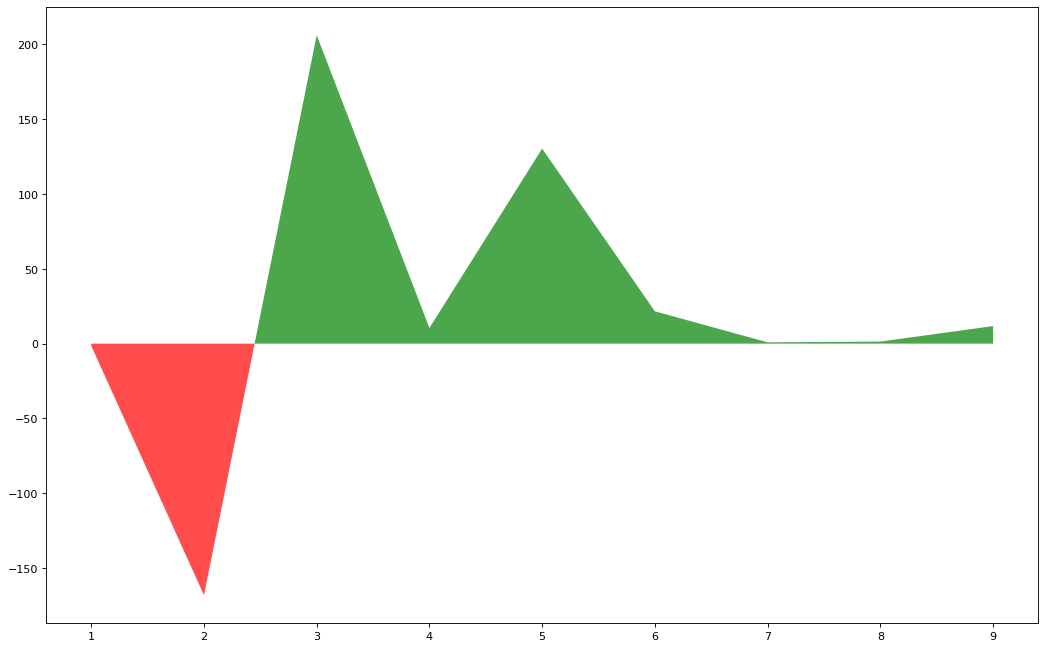

In [ ]:
import numpy as np
import pandas as pd


x = np.arange(dataFrame3.shape[0])
y_returns = (dataFrame3._2019.diff().fillna(0)/dataFrame3._2019.shift(1)).fillna(0) * 100


plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)


plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

Bar Chart

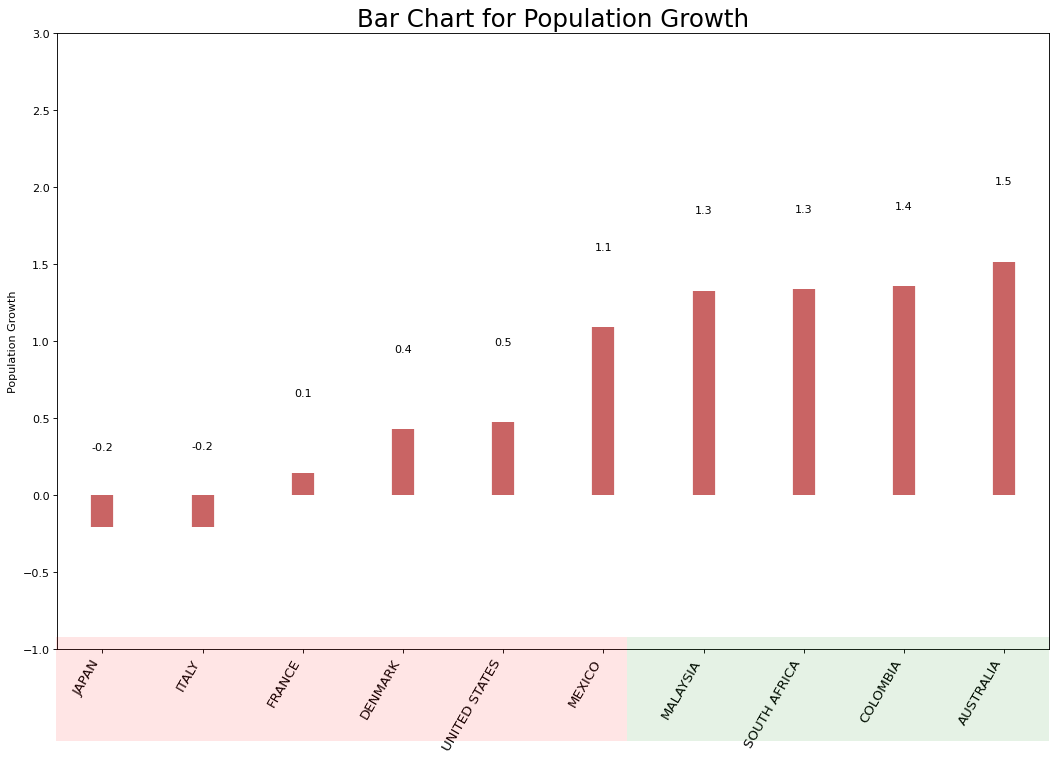

   level_0  index   Country_Name Country Code                Indicator Name  \
0        0    117          Japan          JPN  Population growth (annual %)   
1        1    114          Italy          ITA  Population growth (annual %)   
2        2     75         France          FRA  Population growth (annual %)   
3        3     56        Denmark          DNK  Population growth (annual %)   
4        4    249  United States          USA  Population growth (annual %)   
5        5    152         Mexico          MEX  Population growth (annual %)   
6        6    167       Malaysia          MYS  Population growth (annual %)   
7        7    261   South Africa          ZAF  Population growth (annual %)   
8        8     43       Colombia          COL  Population growth (annual %)   
9        9     11      Australia          AUS  Population growth (annual %)   

  Indicator Code  1960      1961      1962      1963  ...      2012      2013  \
0    SP.POP.GROW   NaN  2.606188  0.931995  1.017

In [ ]:

dataFrame3.sort_values('_2019', inplace=True)
dataFrame3.reset_index(inplace=True)

import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=dataFrame3.index, ymin=0, ymax=dataFrame3._2019, color='firebrick', alpha=0.7, linewidth=20)

for i, _2019 in enumerate(dataFrame3._2019):
    ax.text(i, _2019+0.5, round(_2019, 1), horizontalalignment='center')


ax.set_title('Bar Chart for Population Growth', fontdict={'size':22})
ax.set(ylabel='Population Growth', ylim=(0, 3))
plt.xticks(dataFrame3.index, dataFrame3.Country_Name.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()


print(dataFrame3)

Bar Chart

<ipython-input-112-2a4dae606fd0>:16: UserWarning: FixedFormatter should only be used together with FixedLocator


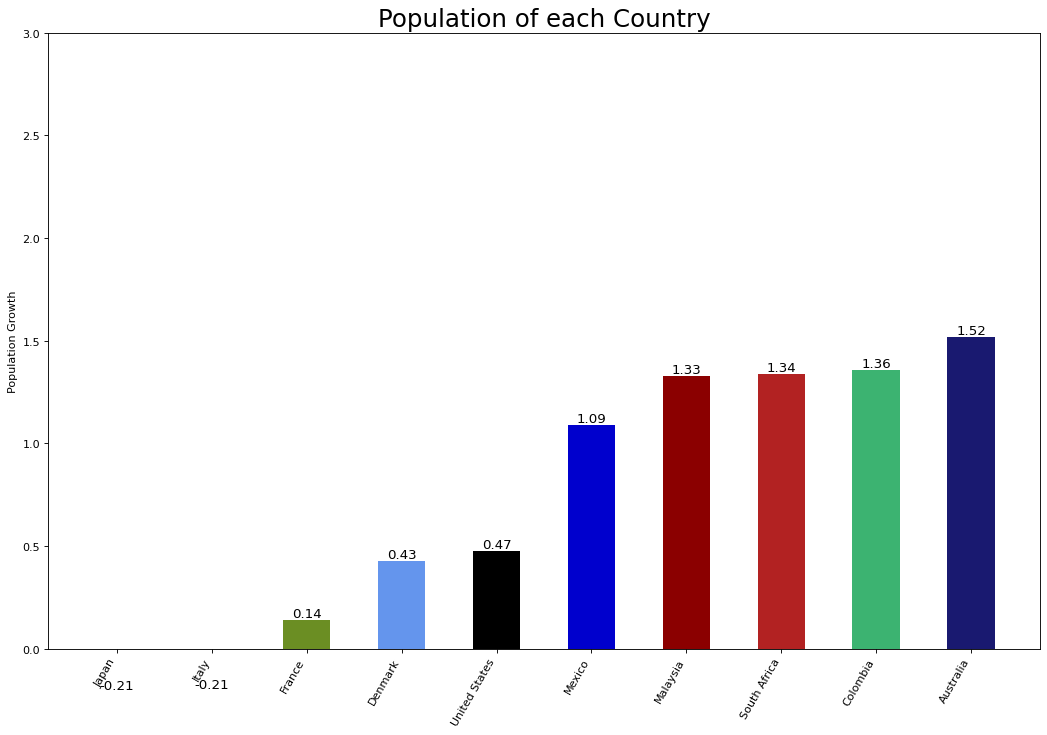

   level_0  index   Country_Name Country Code                Indicator Name  \
0        0    117          Japan          JPN  Population growth (annual %)   
1        1    114          Italy          ITA  Population growth (annual %)   
2        2     75         France          FRA  Population growth (annual %)   
3        3     56        Denmark          DNK  Population growth (annual %)   
4        4    249  United States          USA  Population growth (annual %)   
5        5    152         Mexico          MEX  Population growth (annual %)   
6        6    167       Malaysia          MYS  Population growth (annual %)   
7        7    261   South Africa          ZAF  Population growth (annual %)   
8        8     43       Colombia          COL  Population growth (annual %)   
9        9     11      Australia          AUS  Population growth (annual %)   

  Indicator Code  1960      1961      1962      1963  ...      2012      2013  \
0    SP.POP.GROW   NaN  2.606188  0.931995  1.017

In [ ]:
import random


n = dataFrame3['Country_Name'].nunique()
all_colors = list(plt.cm.colors.cnames.keys())
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(dataFrame3['Country_Name'], dataFrame3['_2019'], color=c, width=.5)
for i, val in enumerate(dataFrame3['_2019'].values):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(dataFrame3['Country_Name'], rotation=60, horizontalalignment= 'right')
plt.title("Population of each Country", fontsize=22)
plt.ylabel('Population Growth')
plt.ylim(0, 3)
plt.show()


print(dataFrame3)


Histogram

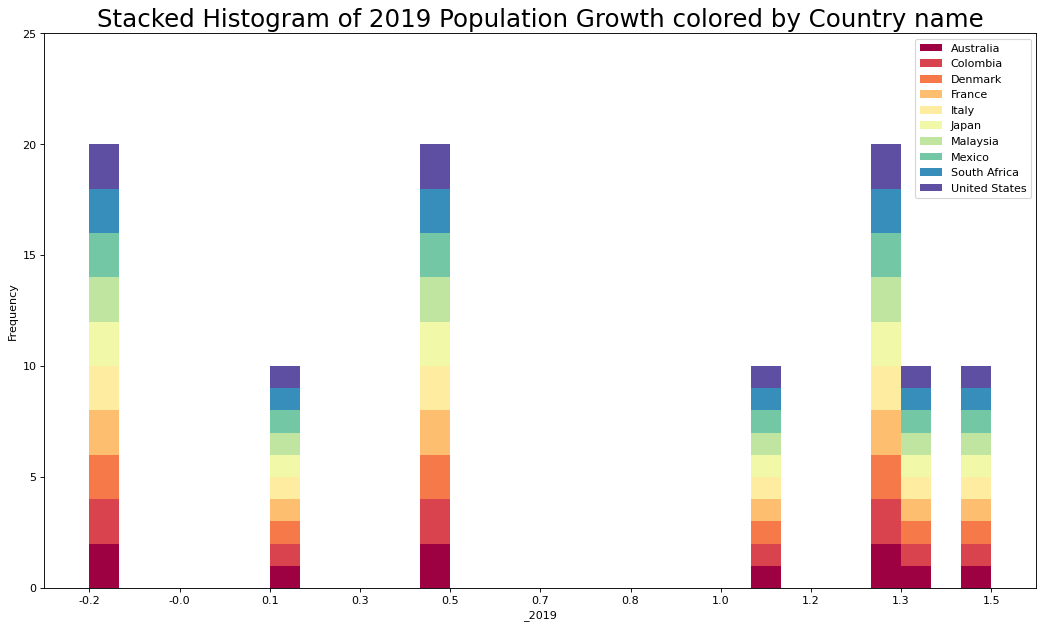

In [ ]:
x_var = '_2019'
groupby_var = 'Country_Name'
dataFrame3_agg = dataFrame3.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [dataFrame3[x_var].values.tolist() for i, df in dataFrame3_agg]

plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(dataFrame3[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of 2019 Population Growth colored by Country name", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

Density Plot

<ipython-input-77-cc5d5d9f1610>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Australia', "_2019"], shade=True, fill=True, color="g", label="Australia", alpha=.7)
<ipython-input-77-cc5d5d9f1610>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Australia', "_2019"], shade=True, fill=True, color="g", label="Australia", alpha=.7)
<ipython-input-77-cc5d5d9f1610>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Colombia', "_2019"], fill=True, color="deeppink", label="Colombia", alpha=.7)
<ipython-input-77-cc5d5d9f1610>:5: UserWarning: Dataset has 0 variance; skippin

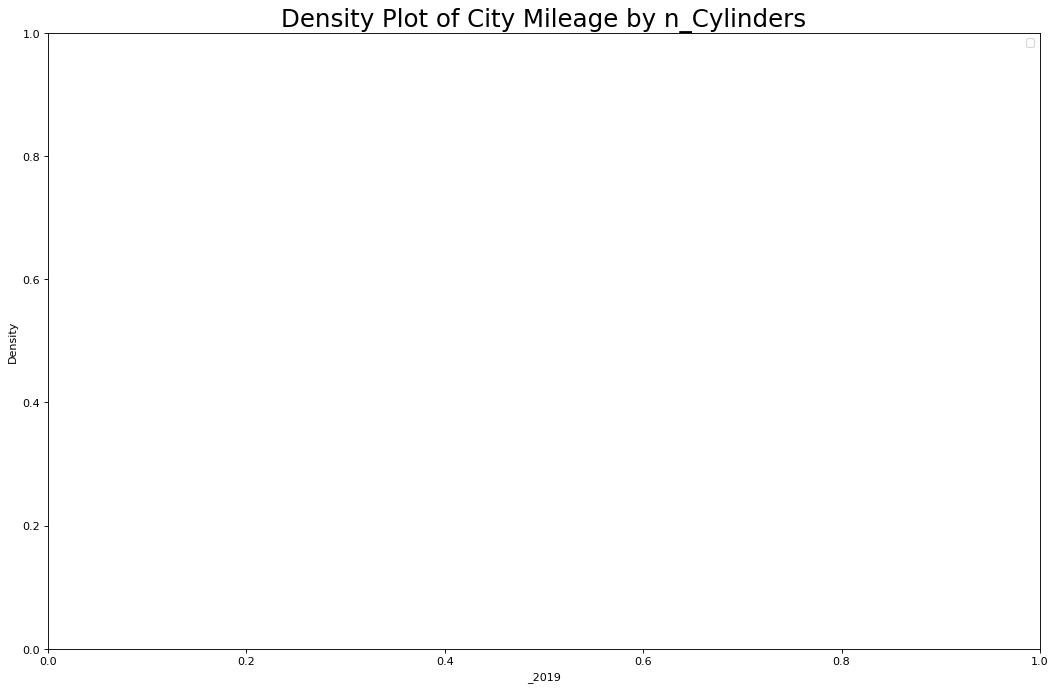

   level_0  index   Country_Name Country Code                Indicator Name  \
0        0    117          Japan          JPN  Population growth (annual %)   
1        1    114          Italy          ITA  Population growth (annual %)   
2        2     75         France          FRA  Population growth (annual %)   
3        3     56        Denmark          DNK  Population growth (annual %)   
4        4    249  United States          USA  Population growth (annual %)   
5        5    152         Mexico          MEX  Population growth (annual %)   
6        6    167       Malaysia          MYS  Population growth (annual %)   
7        7    261   South Africa          ZAF  Population growth (annual %)   
8        8     43       Colombia          COL  Population growth (annual %)   
9        9     11      Australia          AUS  Population growth (annual %)   

  Indicator Code  1960      1961      1962      1963  ...      2012      2013  \
0    SP.POP.GROW   NaN  2.606188  0.931995  1.017

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Australia', "_2019"], shade=True, fill=True, color="g", label="Australia", alpha=.7)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Colombia', "_2019"], fill=True, color="deeppink", label="Colombia", alpha=.7)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Denmark', "_2019"], fill=True, color="dodgerblue", label="Denmark", alpha=.7)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'France', "_2019"], fill=True, color="orange", label="France", alpha=.7)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Italy', "_2019"], fill=True, color="orange", label="Italy", alpha=.7)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Japan', "_2019"], fill=True, color="orange", label="Japan", alpha=.7)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Malaysia', "_2019"], fill=True, color="orange", label="Malaysia", alpha=.7)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'Mexico', "_2019"], fill=True, color="orange", label="Mexico", alpha=.7)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'South Africa', "_2019"], fill=True, color="orange", label="South Africa", alpha=.7)
sns.kdeplot(dataFrame3.loc[dataFrame3['Country_Name'] == 'United States', "_2019"], fill=True, color="orange", label="United States", alpha=.7)

plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

print(dataFrame3)